In [1]:
import pandas as pd


In [2]:
df=pd.read_csv('mallcustomers.csv')

In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# 3. uni varient analysis

# 1.summary statistics

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [7]:
df.shape

(200, 5)

3.visualizations
 # univariate analysis

<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Count'>

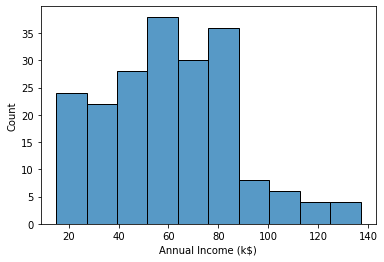

In [8]:
sns.histplot(df['Annual Income (k$)'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Annual Income (k$)'>

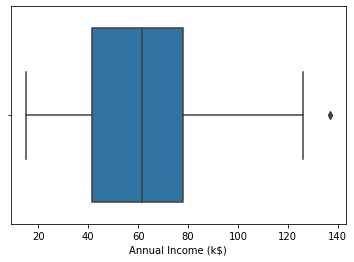

In [9]:
sns.boxplot(df['Annual Income (k$)'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Density'>

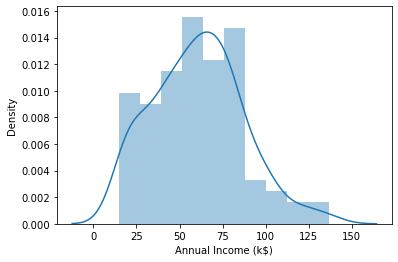

In [10]:
sns.distplot(df['Annual Income (k$)'])

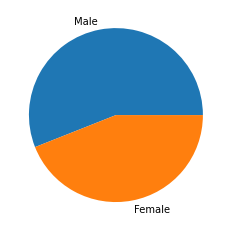

In [11]:
plt.pie(df['Gender'].value_counts(), labels=df['Gender'].unique())
plt.show()

#  Bivarient analysis

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age', ylabel='Annual Income (k$)'>

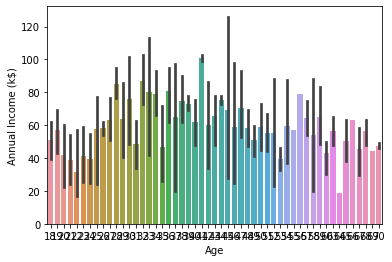

In [12]:
sns.barplot(df['Age'],df['Annual Income (k$)'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

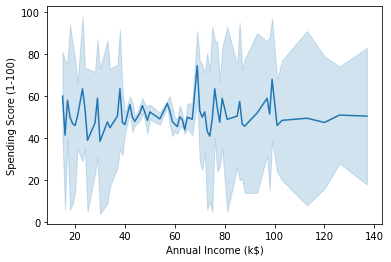

In [13]:
sns.lineplot(df['Annual Income (k$)'], df['Spending Score (1-100)'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Spending Score (1-100)', ylabel='Age'>

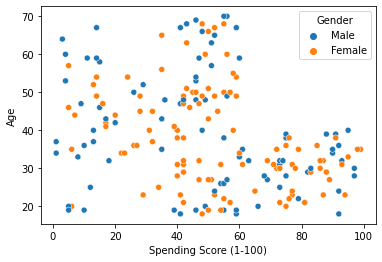

In [14]:
sns.scatterplot(df['Spending Score (1-100)'], df['Age'], hue =df['Gender'])

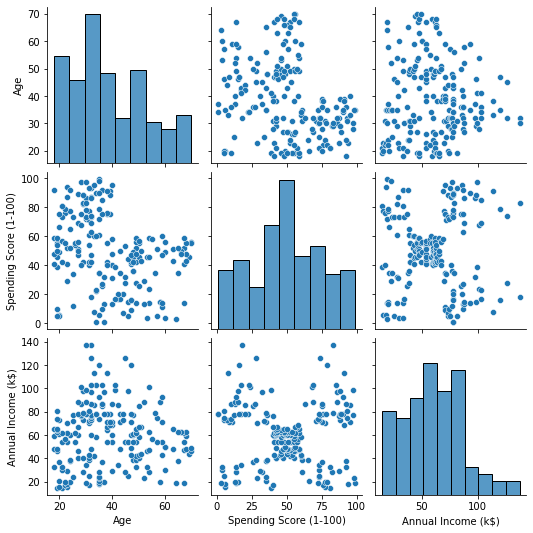

In [15]:
sns.pairplot(data=df[["Age","Gender","Spending Score (1-100)","Annual Income (k$)"]])

<AxesSubplot:>

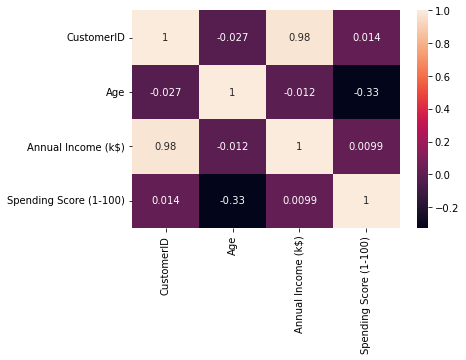

In [16]:
sns.heatmap(df.corr(),annot=True)

#  Perform descriptive statistics on the dataset

In [17]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [18]:
df.drop('Gender',axis=1,inplace=True)
df.head()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,2,21,15,81
2,3,20,16,6
3,4,23,16,77
4,5,31,17,40


# Check the missing value and deal with them

In [19]:
df.isnull().sum()

CustomerID                0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

# Find the outliers and replace them outliers

<AxesSubplot:xlabel='Age'>

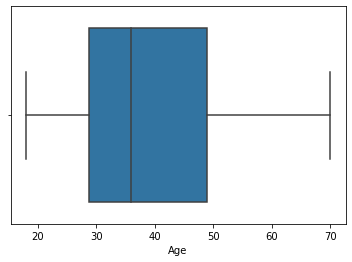

In [20]:
sns.boxplot(x=df['Age'])

# check for the categorical columns and perform encoding

In [22]:
from sklearn.preprocessing import LabelEncoder
l_en = LabelEncoder()

In [23]:
df['Annual Income (k$)'] = l_en.fit_transform(df['Annual Income (k$)'])
df.head()


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,0,39
1,2,21,0,81
2,3,20,1,6
3,4,23,1,77
4,5,31,2,40


# scaling the data

In [24]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(df)
data_scaled[0:5]

array([[0.        , 0.01923077, 0.        , 0.3877551 ],
       [0.00502513, 0.05769231, 0.        , 0.81632653],
       [0.01005025, 0.03846154, 0.01587302, 0.05102041],
       [0.01507538, 0.09615385, 0.01587302, 0.7755102 ],
       [0.0201005 , 0.25      , 0.03174603, 0.39795918]])

# perform any of the clustering algorithms

In [25]:
from sklearn.cluster import KMeans
km = KMeans()
res = km.fit_predict(data_scaled)
res

C:\Users\azhag\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([1, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1,
       5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 4, 1, 5, 1,
       5, 1, 4, 6, 6, 6, 4, 6, 6, 4, 4, 3, 4, 4, 6, 4, 4, 6, 4, 4, 4, 6,
       3, 4, 6, 6, 4, 3, 4, 4, 4, 6, 3, 3, 6, 3, 4, 3, 4, 3, 6, 3, 4, 6,
       6, 3, 4, 6, 3, 3, 6, 6, 3, 6, 3, 6, 6, 3, 4, 6, 3, 6, 4, 3, 4, 4,
       4, 6, 3, 6, 6, 6, 4, 3, 3, 3, 6, 3, 3, 2, 7, 2, 3, 2, 0, 2, 0, 2,
       7, 2, 7, 2, 0, 2, 7, 2, 0, 2, 7, 2, 7, 2, 0, 2, 7, 2, 0, 2, 0, 2,
       0, 2, 7, 2, 7, 2, 0, 2, 7, 2, 0, 2, 0, 2, 7, 2, 0, 2, 7, 2, 0, 2,
       0, 2, 0, 2, 7, 2, 0, 2, 0, 2, 0, 2, 0, 2, 7, 2, 7, 2, 0, 2, 0, 2,
       7, 2])

In [26]:
data = pd.DataFrame(data_scaled, columns = df.columns)
data.head()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
0,0.000000,0.019231,0.000000,0.387755
1,0.005025,0.057692,0.000000,0.816327
2,0.010050,0.038462,0.015873,0.051020
3,0.015075,0.096154,0.015873,0.775510
4,0.020101,0.250000,0.031746,0.397959


In [27]:
data['kclus'] = pd.Series(res)
data.head()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),kclus
0,0.000000,0.019231,0.000000,0.387755,1
1,0.005025,0.057692,0.000000,0.816327,1
2,0.010050,0.038462,0.015873,0.051020,5
3,0.015075,0.096154,0.015873,0.775510,1
4,0.020101,0.250000,0.031746,0.397959,5


In [28]:
data['kclus'].unique()

array([1, 5, 4, 6, 3, 2, 7, 0])

In [29]:
data['kclus'].value_counts()

2    39
6    28
4    27
1    24
3    24
5    21
0    21
7    16
Name: kclus, dtype: int64

In [30]:
d = data.iloc[:,0:4]
d.head()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
0,0.000000,0.019231,0.000000,0.387755
1,0.005025,0.057692,0.000000,0.816327
2,0.010050,0.038462,0.015873,0.051020
3,0.015075,0.096154,0.015873,0.775510
4,0.020101,0.250000,0.031746,0.397959


In [31]:
dp = data.iloc[:,4:]
dp.head()

,kclus
0,1
1,1
2,5
3,1
4,5


# split the data into dependent and independent variables.

In [32]:
X = df.drop("Spending Score (1-100)",axis=1)
Y = df['Spending Score (1-100)']
X.head()

,CustomerID,Age,Annual Income (k$)
0,1,19,0
1,2,21,0
2,3,20,1
3,4,23,1
4,5,31,2


In [33]:
Y.head()

0    39
1    81
2     6
3    77
4    40
Name: Spending Score (1-100), dtype: int64

# split the data into training and testing 

In [34]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(d,dp,test_size=0.4,random_state=1)
x_train.head()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
154,0.773869,0.557692,0.746032,0.153061
90,0.452261,0.961538,0.476190,0.551020
81,0.407035,0.384615,0.428571,0.551020
122,0.613065,0.423077,0.603175,0.581633
191,0.959799,0.269231,0.936508,0.693878


In [35]:
x_test.head()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
58,0.291457,0.173077,0.349206,0.510204
40,0.201005,0.903846,0.253968,0.346939
34,0.170854,0.596154,0.206349,0.132653
102,0.512563,0.942308,0.523810,0.591837
184,0.924623,0.442308,0.904762,0.387755


In [36]:
y_train.head()

,kclus
154,0
90,4
81,3
122,3
191,2


In [37]:
y_test.head()

,kclus
58,6
40,4
34,5
102,4
184,0


# build the model

In [38]:
x = df.iloc[:,[2,3]].values

C:\Users\azhag\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\azhag\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\azhag\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\azhag\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmea

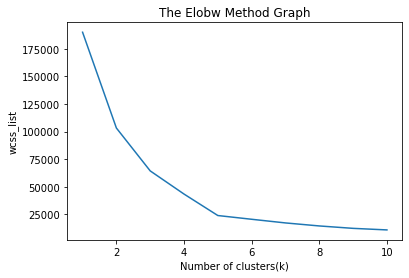

In [39]:
from sklearn.cluster import KMeans  
wcss_list= []  #Initializing the list for the values of WCSS  
  
#Using for loop for iterations from 1 to 10.  
for i in range(1, 11):  
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state= 42)  
    kmeans.fit(x)  
    wcss_list.append(kmeans.inertia_)  
plt.plot(range(1, 11), wcss_list)  
plt.title('The Elobw Method Graph')  
plt.xlabel('Number of clusters(k)')  
plt.ylabel('wcss_list')  
plt.show()

# Train the model

In [40]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state= 42)  
y_predict= kmeans.fit_predict(x)

C:\Users\azhag\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


# Test the model

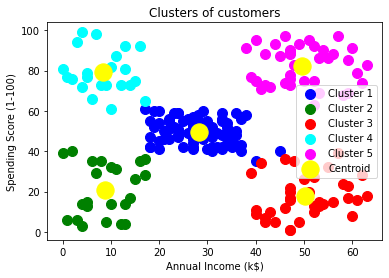

In [41]:
plt.scatter(x[y_predict == 0, 0], x[y_predict == 0, 1], s = 100, c = 'blue', label = 'Cluster 1') #for first cluster  
plt.scatter(x[y_predict == 1, 0], x[y_predict == 1, 1], s = 100, c = 'green', label = 'Cluster 2') #for second cluster  
plt.scatter(x[y_predict== 2, 0], x[y_predict == 2, 1], s = 100, c = 'red', label = 'Cluster 3') #for third cluster  
plt.scatter(x[y_predict == 3, 0], x[y_predict == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4') #for fourth cluster  
plt.scatter(x[y_predict == 4, 0], x[y_predict == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5') #for fifth cluster  
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroid')   
plt.title('Clusters of customers')  
plt.xlabel('Annual Income (k$)')  
plt.ylabel('Spending Score (1-100)')  
plt.legend()  
plt.show()

# measure the performance using evaluation metrics

from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)


# CONCLUSION

In [46]:
pred_test = lr.predict(x_test)
pred_test[0:5]

array([[5.42976559],
       [3.55037779],
       [4.34784467],
       [1.4964985 ],
       [2.8867715 ]])

In [47]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import accuracy_score
mse = mean_squared_error(pred_test,y_test)
print("The Mean squared error is: ", mse)
rmse = np.sqrt(mse)
print("The Root mean squared error is: ", rmse)
mae = mean_absolute_error(pred_test,y_test)
print("The Mean absolute error is: ", mae)
acc = lr.score(x_test,y_test)
print("The accuracy is: ", acc)

The Mean squared error is:  3.563973120107691
The Root mean squared error is:  1.8878488075340385
The Mean absolute error is:  1.566125780351533
The accuracy is:  0.2177568514458923
